<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DataScience/210128_k_fold_and_model_evaluations_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 210128_K-fold cross-validation and model_evaluations

오늘은 모델의 평가에 대해서 알아보고자 한다.
이전에 모델을 훈련세트, 검증세트, 테스트세트에 대해서 나누는 것에 대해 배웠다. 이에 대해 확장 방법과 함께 모델의 평가 지표에 대해 알아보고자 한다. 오늘은 거의 이론 공부이다..

## 1. K-fold cross-validation
k-겹 교차 검증에 대해 알아보자.

이전에는 단순히 훈련세트, 검증세트, 테스트세트로 데이터를 나눠서 사용했다.
하지만 검증 세트의 내용에 따라 예측 모델의 성능이 달라질 수 있다는 문제가 있다. 즉 어떻게 검증 세트를 고를 것이냐가 고민인데, 애초에 '고른다'는 것부터 민감할 수 있다.

이를 위한 방법이 바로 **K-fold cross-validation**이다. 이는 훈련세트를 k개의 부분으로 랜덤하게 나눈 후, 그 중 1개를 검증세트로 사용하게 된다. 이 과정을 **'겹치지 않게' k번 반복하여** k개의 모델과 성능 추정을 얻는다.


##2. Strafied K-fold cross-validation

하지만, 하나의 문제가 있다. 데이터가 특정 부분에 몰려 있어, fold를 실시시 편향이 일어날 경우, 훈련세트와 검증세트의 내용물이 아예 달라질수도 있어 학습의 검증에 의미가 없을 수도 있다. 이를 위한 방법이 바로 **strafied k-fold cross-validation, 계층적 k-겹 교차 검증**이다. 
이는 클래스 별 데이터 개수의 비율을 유지하게 한다.

scikit-learn에는 이를 위한 메소드가 있다.


In [ ]:
#구조를 보면 다음과 같다.

import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10, shuffle = True, 
                        random_state = 1).split(X_train, y_train)
scores = []  # 자른 위치에 따른 정확도 검토,
for k, (train, test) in enumerate(kfold):
  fit(X_train, y_train)
  # score 계산 후.
  scores.append(score)


## 3. confusion matrix

"분류" 모델의 성능을 정량화 하는 법이 있을까?
주어진 모델이 문제에 적합한지 측정하기 위해서는 맞다고 할 것을 맞다고 하고, 아닌 것을 아니라고 올바르게 말해야 할 것이다. 이에 대해서 알고리즘의 성능을 행렬로 표현한 것이 **Confusion matrix**이다.

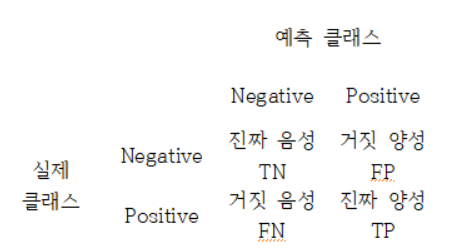
 

In [ ]:
# X_test랑 사용할 모델을 정의하지는 않았다.
# 이런식의 구조로 짜면 된다.
from sklearn.metrics import confusion_matrix

y_pred = predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

위의 4개의 값을 바탕으로, 분류 모델의 평가 지표들을 만들 수 있다.
- 오차(ERR) : 잘못된 예측의 정도
$$ ERR = \frac{FP + FN}{FP + FN + TP + TN}$$
- 정확도(ACC) : 옳은 예측의 정도
$$ ACC = 1 - ERR = \frac{TP + TN}{FP + FN + TP + TN}$$
- 진짜 양성 비율(TPR), 거짓 양성 비율(FPR) 
$$ FPR = \frac{FP}{FP + TN} \\
TPR = \frac{TP}{FN + TP}$$
- 정밀도 (PRE)  : 양성이라고 예측한 애들이 진짜 양성일 확률
$$ PRE = \frac{TP}{TP + FP}$$
- 재현율 (REC) : 실제로 양성인 애들 중, 양성이라고 예측한 애들
$$ REC = \frac{TP}{FN + TP} = TPR$$


한편, PRE와 REC를 활용하여 F1 점수도 계산할 수 있다.

다음에는 F1 점수의 의미와 ROC 곡선에 대해 알아보자. 